# ✅ Tallaabada 1: Import libraries-ka lagama maarmaanka ah


In [1]:
# ✅ Tallaabada 1: Import libraries-ka lagama maarmaanka ah

import pandas as pd                # Xog akhris/maamul
import numpy as np                 # Xisaab & array manipulation
import matplotlib.pyplot as plt    # Sawirro iyo visualizations
import seaborn as sns              # Visualizations qurxoon

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import joblib                      # Save/load models

# Optional settings for seaborn
sns.set(style="whitegrid")


# ✅ Tallaabada 2: Akhri dataset-ka


In [3]:
# ✅ Tallaabada 2: Akhri dataset-ka

# 1. Upload CSV file haddii aad ku jirto Google Colab
from google.colab import files
uploaded = files.upload()

# 2. Akhri faylka (badanaa magaciisu waa 'car_price.csv')
df = pd.read_csv("/content/ford.csv")

# 3. Muuji xogta ugu horeysa
df.head()


Saving ford.csv to ford (1).csv


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
# Eeg cabbirka xogta (tirada safafka iyo tiirarka)
print("Shape:", df.shape)

# Muuji noocyada datatype-yada iyo nulls
df.info()

# Muuji sharraxaad guud oo tirakoob ah
df.describe()


Shape: (17965, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


# ✅ Tallaabada 3: Baaris iyo saarid duplicates


In [5]:
# ✅ Tallaabada 3: Baaris iyo saarid duplicates

# 1. Tirada safafka labalab ah
duplicates = df.duplicated().sum()
print("Tirada duplicates:", duplicates)

# 2. Haddii ay jiraan, ka saar
df = df.drop_duplicates()

# 3. Dib u eeg cabbirka xogta
print("Cabbirka kadib duplicates-ka:", df.shape)


Tirada duplicates: 154
Cabbirka kadib duplicates-ka: (17811, 9)


#Isku Eegid & Saxid Xog Khaldan (Fixing Inconsistencies)

In [6]:
# ✅ Tallaabada 4: Baarista qiimaha tiirarka qoraalka ah (categorical)

# Eeg qiimayaasha kala duwan ee model, transmission, fuelType
print("== transmission ==")
print(df['transmission'].value_counts())

print("\n== fuelType ==")
print(df['fuelType'].value_counts())

print("\n== model ==")
print(df['model'].value_counts().head())  # Top 5 only

# ✅ Optional: Remove leading/trailing whitespaces + lowercasing
df['transmission'] = df['transmission'].str.strip().str.title()
df['fuelType'] = df['fuelType'].str.strip().str.title()
df['model'] = df['model'].str.strip()


== transmission ==
transmission
Manual       15382
Automatic     1354
Semi-Auto     1075
Name: count, dtype: int64

== fuelType ==
fuelType
Petrol      12080
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

== model ==
model
Fiesta      6509
Focus       4555
Kuga        2208
EcoSport    1127
C-MAX        542
Name: count, dtype: int64


#✅ Step 5: Exploratory Data Analysis (EDA)

# ✅ Sawirro: Histograms for distribution of numeric features


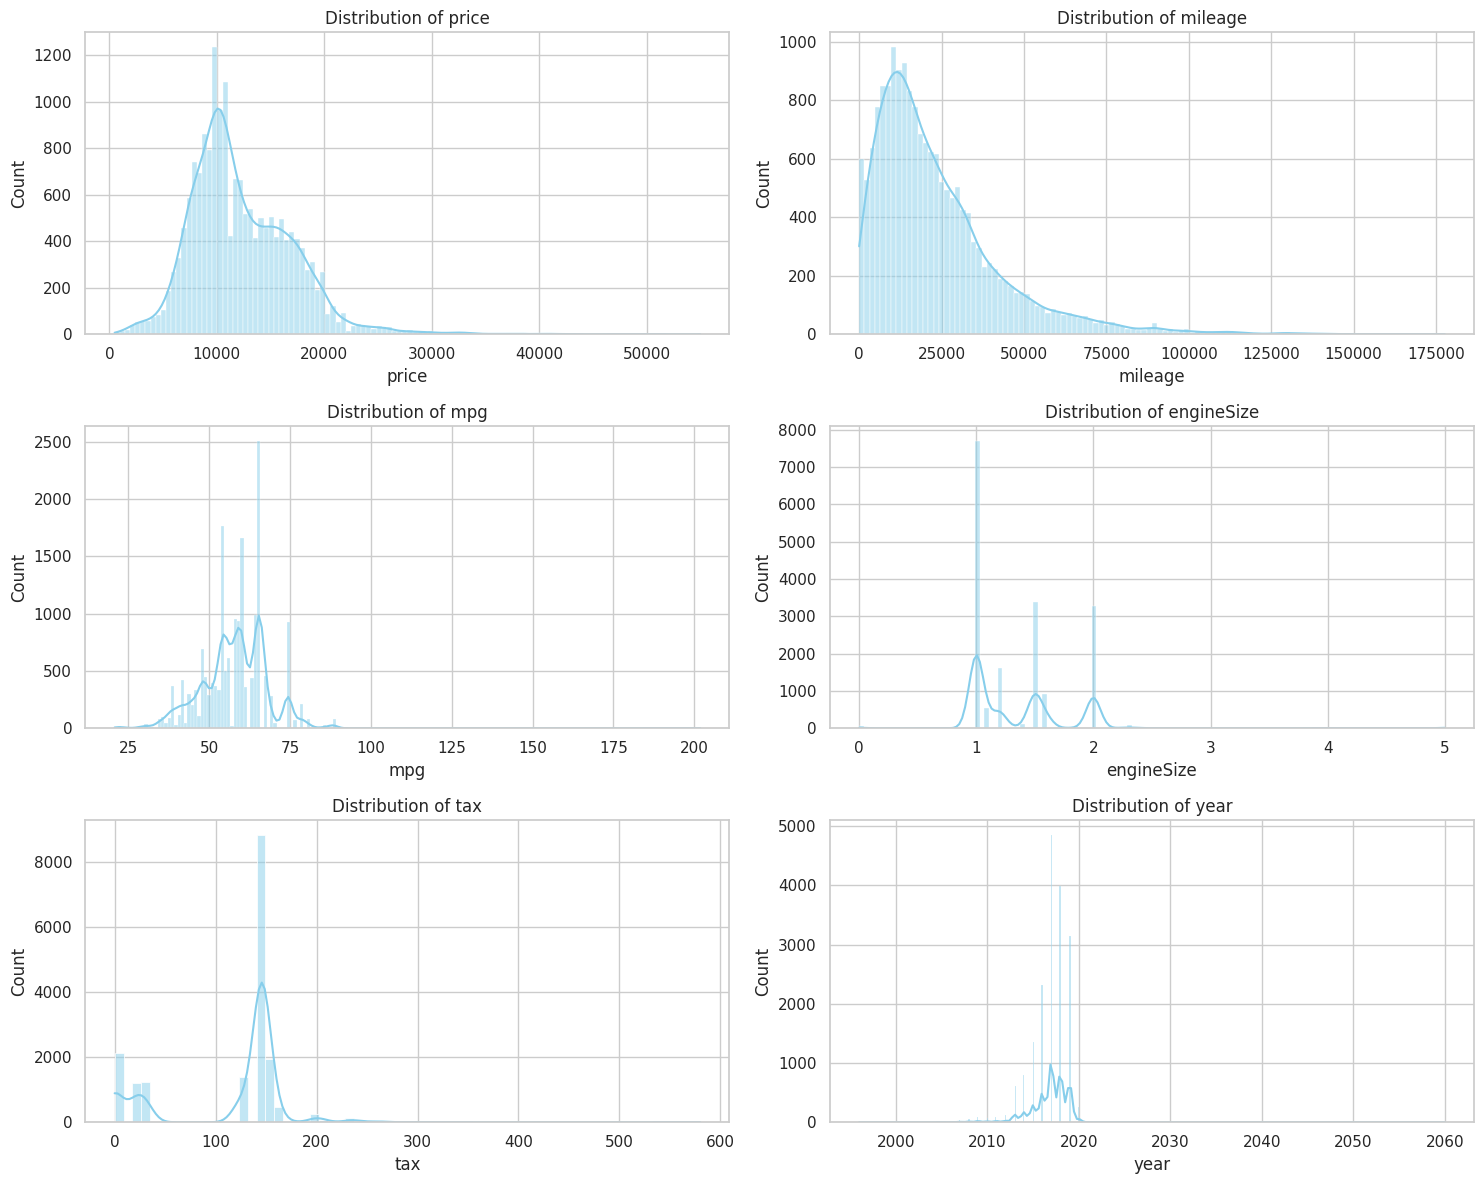

In [7]:
# ✅ Sawirro: Histograms for distribution of numeric features

numeric_cols = ['price', 'mileage', 'mpg', 'engineSize', 'tax', 'year']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# ✅ Count plots for categorical features


/tmp/ipython-input-468732077.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='transmission', palette='Set2')
/tmp/ipython-input-468732077.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fuelType', palette='Set3')


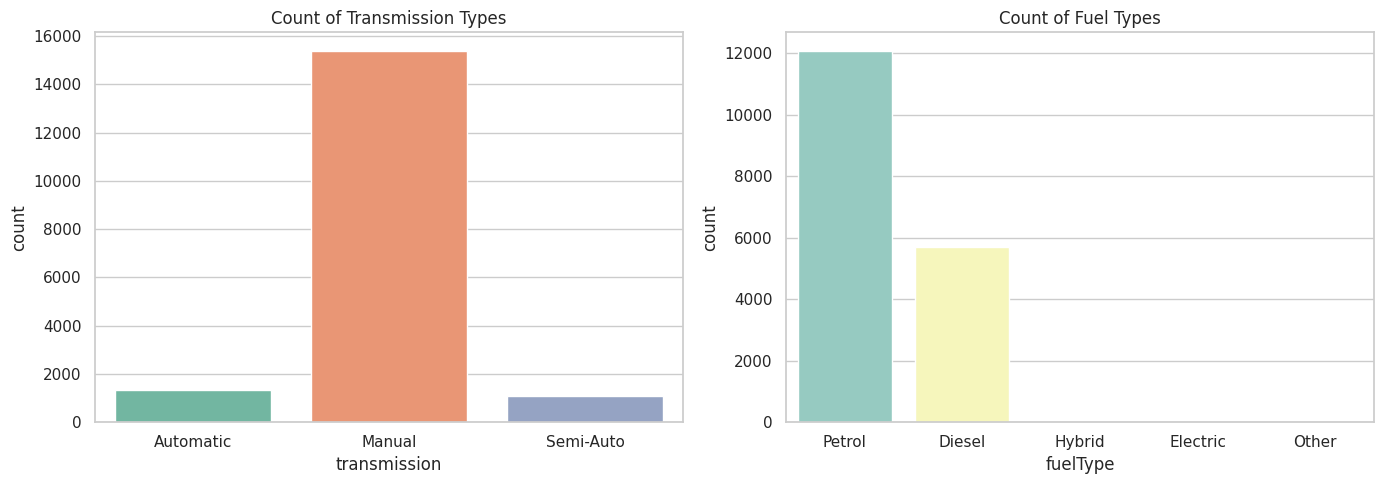

In [8]:
# ✅ Count plots for categorical features

plt.figure(figsize=(14, 5))

# Transmission
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='transmission', palette='Set2')
plt.title('Count of Transmission Types')

# Fuel Type
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='fuelType', palette='Set3')
plt.title('Count of Fuel Types')

plt.tight_layout()
plt.show()


# ✅ Mean price by fuelType


Qiimaha celceliska ah ee fuelType kasta:
fuelType
Hybrid      22149.090909
Electric    15737.500000
Other       13800.000000
Diesel      13642.600946
Petrol      11602.632616
Name: price, dtype: float64


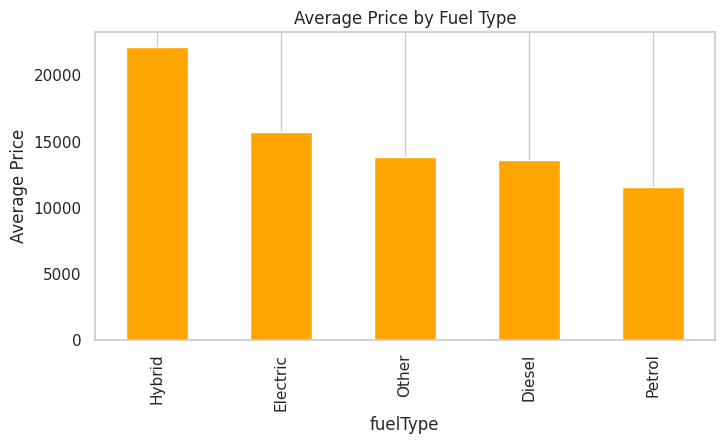

In [9]:
# ✅ Mean price by fuelType
fuel_price = df.groupby('fuelType')['price'].mean().sort_values(ascending=False)
print("Qiimaha celceliska ah ee fuelType kasta:")
print(fuel_price)

# ✅ Visualize
fuel_price.plot(kind='bar', figsize=(8, 4), color='orange', title='Average Price by Fuel Type')
plt.ylabel('Average Price')
plt.grid(axis='y')
plt.show()


✅ Step 6: Outlier Detection & Handling


# ✅ Muujinta outliers-ka la arki karo


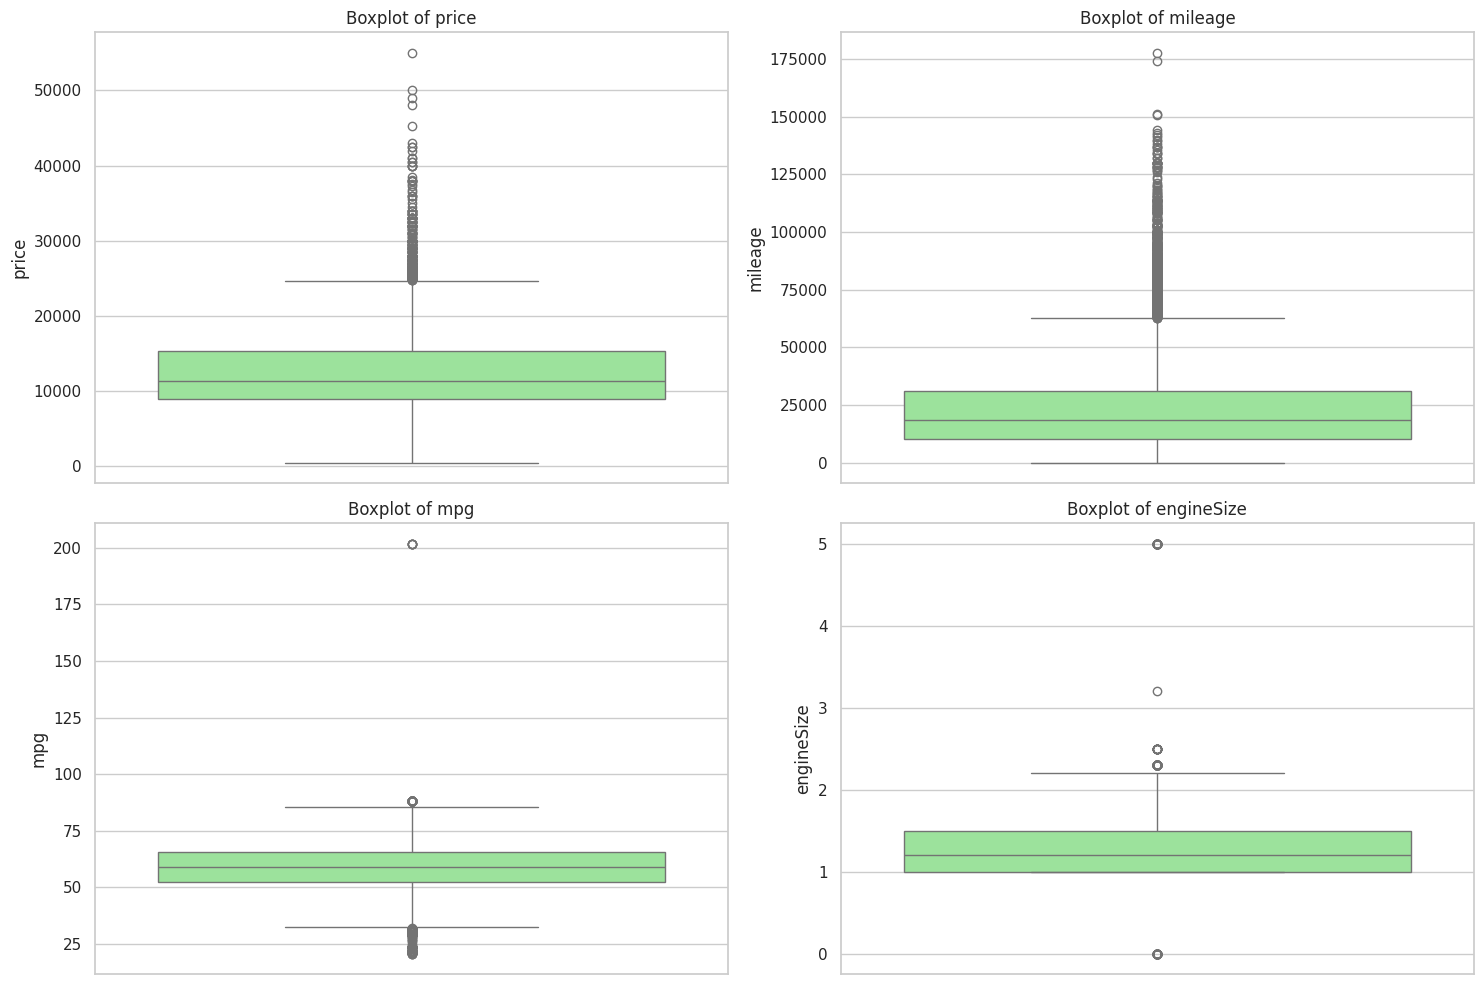

In [10]:
# ✅ Muujinta outliers-ka la arki karo

cols_to_check = ['price', 'mileage', 'mpg', 'engineSize']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


#✅ 6.2 - 6.3 - 6.4: Outlier Detection, Removal, & Re-Boxplot

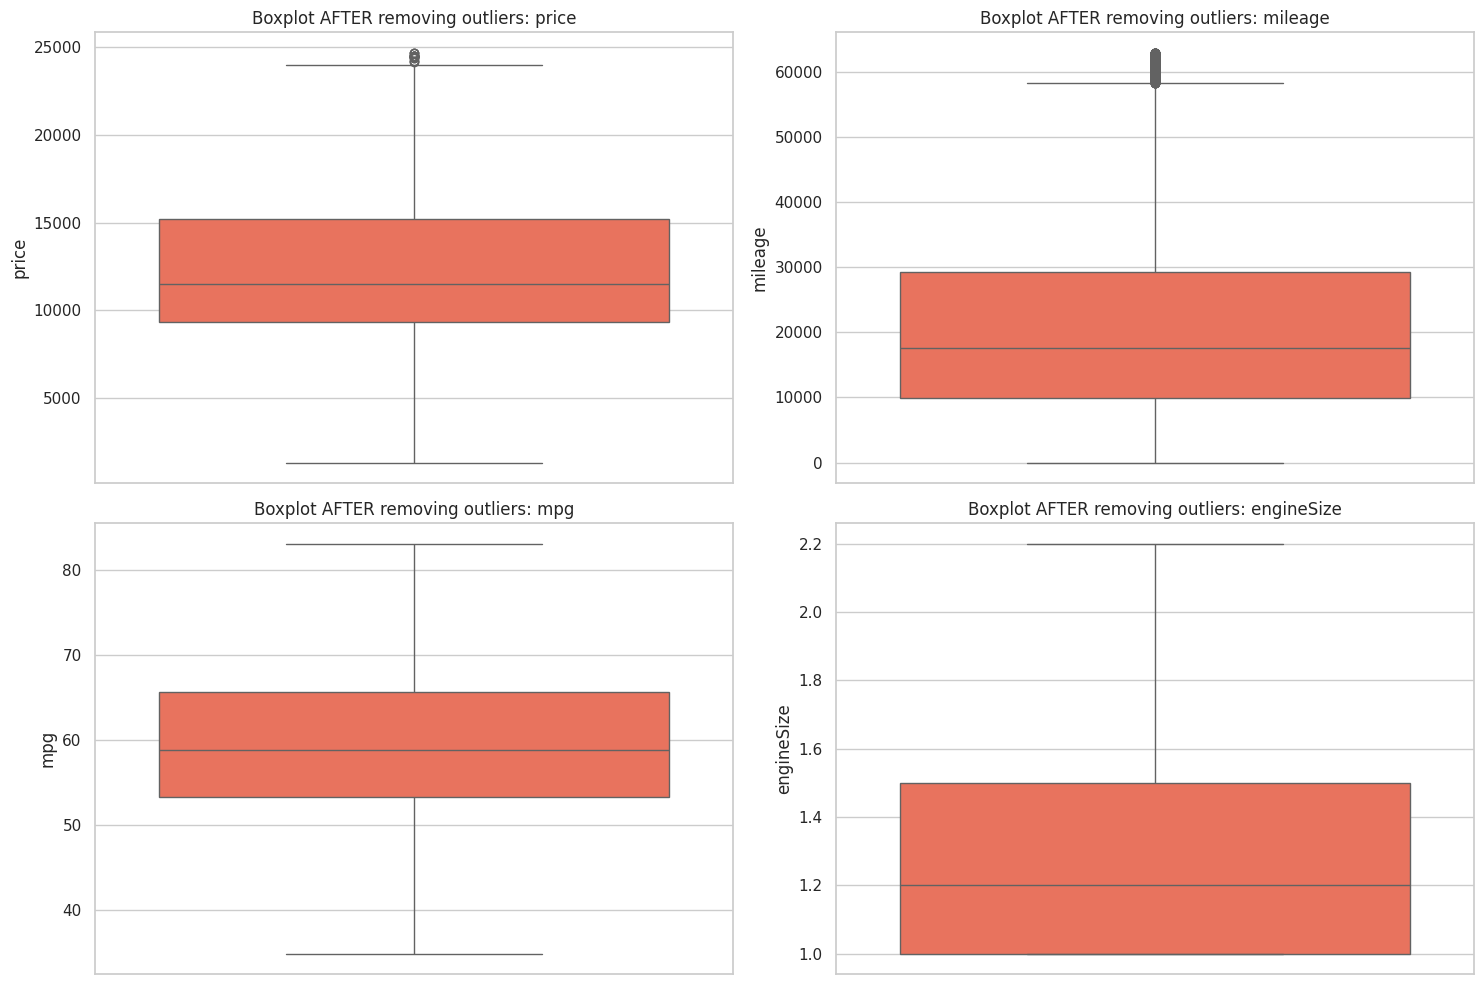

In [14]:
# ✅ Function-ka saarista outliers-ka (IQR method)

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Waa mid classic, fudud, aan ku xiranayn distribution nooca uu yahay
# Badbaado u leh datasets-ka structured
# Waxaa la xisaabiyaa Q1 (25%) iyo Q3 (75%) → IQR = Q3 - Q1
# Outliers = wixii ka hooseeya (Q1 - 1.5*IQR) ama ka sareeya (Q3 + 1.5*IQR)

# ✅ Ka saar outliers columns-ka muhiimka ah
cols_to_clean = ['price', 'mileage', 'mpg', 'engineSize']
for col in cols_to_clean:
    df = remove_outliers_iqr(df, col)

# ✅ Dib u eeg boxplots ka dib markaan outliers saarno
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_clean, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df[col], color='tomato')
    plt.title(f'Boxplot AFTER removing outliers: {col}')
plt.tight_layout()
plt.show()


# ✅ Tallaabada 7: Ka saar column-ka 'model' oo kaliya

In [15]:
# ✅ Tallaabada 7: Ka saar column-ka 'model' oo kaliya

df.drop(columns=['model'], inplace=True)

# ✅ Xaqiiji in la saaray
print("Columns after dropping 'model':")
print(df.columns)


Columns after dropping 'model':
Index(['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')


#✅ Step 8: Encoding for Categorical Features

In [16]:
# ✅ Tallaabada 8: One-Hot Encoding for 'transmission' and 'fuelType'

df = pd.get_dummies(df, columns=['transmission', 'fuelType'], drop_first=True)

# ✅ Xaqiiji in encoding uu shaqeeyay
print("Columns after encoding:")
print(df.columns)


Columns after encoding:
Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Electric',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')


#✅ Step 9: Feature Selection

In [17]:
# ✅ Tallaabada 9: Xiriirka u dhexeeya price iyo features kale

# Kaliya numeric columns
correlation = df.corr(numeric_only=True)

# Eeg xiriirka la leh 'price'
correlation_with_price = correlation['price'].sort_values(ascending=False)

# Daabac
print("📊 Xiriirka features-ka kale la leeyihiin 'price':")
print(correlation_with_price)


📊 Xiriirka features-ka kale la leeyihiin 'price':
price                     1.000000
year                      0.627637
tax                       0.463507
engineSize                0.384989
transmission_Semi-Auto    0.101444
fuelType_Hybrid           0.030083
fuelType_Electric         0.009574
fuelType_Other            0.002992
transmission_Manual      -0.209322
fuelType_Petrol          -0.277862
mpg                      -0.328989
mileage                  -0.490267
Name: price, dtype: float64


#✅ Doorashada  Features-ka ugu Muhiimsan

In [18]:
# Tusaale: Xulo kuwa correlation fiican leh
selected_features = [
    'year', 'engineSize', 'tax',
    'mileage', 'mpg', 'transmission_Manual'
]

# Features (X) iyo target (y)
X = df[selected_features]
y = df['price']


#✅ Step 10: Feature Scaling (StandardScaler)

In [19]:
from sklearn.preprocessing import StandardScaler

# ✅ Tallaabada 10: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Optional: Hubi xogta la scale gareeyay
pd.DataFrame(X_scaled, columns=selected_features).head()


,year,engineSize,tax,mileage,mpg,transmission_Manual
0,-0.022101,-0.846700,0.618232,-0.337230,-0.054778,-2.576672
1,0.558044,-0.846700,0.618232,-0.825928,-0.054778,0.388098
2,-0.022101,-0.846700,0.618232,-0.585675,-0.054778,0.388098
3,1.138189,0.486395,0.534094,-0.727847,-2.007994,0.388098
4,1.138189,-0.846700,0.534094,-1.367335,-1.065062,-2.576672


#✅ Step 11: Data Splitting (Train/Test Split)

In [20]:
from sklearn.model_selection import train_test_split

# ✅ Tallaabada 11: Kala qeybi xogta
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ✅ Hubi cabbirka xogta
print("X_train:", X_train_scaled.shape)
print("X_test:", X_test_scaled.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (13145, 6)
X_test: (3287, 6)
y_train: (13145,)
y_test: (3287,)


#✅ Code: Random Forest Training + Evaluation

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Abuur model-ka
rf_model = RandomForestRegressor(random_state=42)

# 2. Tababar model-ka
rf_model.fit(X_train_scaled, y_train)

# 3. Samee saadaal
y_pred_rf = rf_model.predict(X_test_scaled)

# 4. Qiimeyn
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

# 5. Daabac natiijooyinka
print("✅ RF Model Evaluation:")
print(f"MAE (celcelis khalad): ${mae:.2f}")
print(f"RMSE (khalad adag): ${rmse:.2f}")
print(f"R² Score (saxnaanta): {r2:.4f}")


✅ RF Model Evaluation:
MAE (celcelis khalad): $971.34
RMSE (khalad adag): $1336.82
R² Score (saxnaanta): 0.8863


# ✅ Function: Saadaasha qiimaha gaariga (Random Forest)

In [22]:
# ✅ Function: Saadaasha qiimaha gaariga (Random Forest)

def predict_price_rf(year, engineSize, tax, mileage, mpg, transmission_Manual):
    import pandas as pd

    # 1. Diyaari xogta cusub
    input_data = pd.DataFrame([{
        'year': year,
        'engineSize': engineSize,
        'tax': tax,
        'mileage': mileage,
        'mpg': mpg,
        'transmission_Manual': transmission_Manual
    }])

    # 2. Ku scale-garee sida features-ka tababarka
    input_scaled = scaler.transform(input_data)

    # 3. Samee saadaal
    prediction = rf_model.predict(input_scaled)[0]

    return round(prediction, 2)


In [23]:
# Tijaabi qiimo gaar ah
predicted = predict_price_rf(2020, 1.5, 150, 12000, 50.0, 1)
print(f"✅ Qiimaha la saadaaliyay (Random Forest): ${predicted}")


✅ Qiimaha la saadaaliyay (Random Forest): $18133.74


# training and evaluation XGBoost Regressor

In [24]:
from xgboost import XGBRegressor

# 1. Abuur model-ka
xgb_model = XGBRegressor(random_state=42, verbosity=0)

# 2. Tababar model-ka
xgb_model.fit(X_train_scaled, y_train)

# 3. Samee saadaal
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 4. Qiimeyn
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# 5. Natiijo
print("✅ XGBoost Model Evaluation:")
print(f"MAE: ${mae_xgb:.2f}")
print(f"RMSE: ${rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")


✅ XGBoost Model Evaluation:
MAE: $884.94
RMSE: $1220.02
R² Score: 0.9053


#✅ Hadda: XGBoost Model Prediction Function

In [25]:
# ✅ Function: Saadaasha qiimaha gaariga (XGBoost)

def predict_price_xgb(year, engineSize, tax, mileage, mpg, transmission_Manual):
    import pandas as pd

    input_data = pd.DataFrame([{
        'year': year,
        'engineSize': engineSize,
        'tax': tax,
        'mileage': mileage,
        'mpg': mpg,
        'transmission_Manual': transmission_Manual
    }])

    input_scaled = scaler.transform(input_data)
    prediction = xgb_model.predict(input_scaled)[0]

    return round(prediction, 2)

# ✅ Tijaabo: Saadaal
predicted_xgb = predict_price_xgb(2020, 1.5, 150, 12000, 50.0, 1)
print(f"✅ Qiimaha la saadaaliyay (XGBoost): ${predicted_xgb}")


✅ Qiimaha la saadaaliyay (XGBoost): $18403.220703125


#✅ Gradient Boosting Regressor (GBR) Training + Evaluation

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# ✅ Tallaabada: Tababaridda GBR
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_scaled, y_train)

# ✅ Saadaal & Qiimeyn
y_pred_gbr = gbr_model.predict(X_test_scaled)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("✅ Gradient Boosting Regressor Evaluation:")
print(f"MAE: ${mae_gbr:.2f}")
print(f"RMSE: ${rmse_gbr:.2f}")
print(f"R² Score: {r2_gbr:.4f}")


✅ Gradient Boosting Regressor Evaluation:
MAE: $1028.82
RMSE: $1400.28
R² Score: 0.8752


# ✅ Function: Saadaasha qiimaha gaariga (GBR)

In [27]:
# ✅ Function: Saadaasha qiimaha gaariga (GBR)

def predict_price_gbr(year, engineSize, tax, mileage, mpg, transmission_Manual):
    import pandas as pd

    input_data = pd.DataFrame([{
        'year': year,
        'engineSize': engineSize,
        'tax': tax,
        'mileage': mileage,
        'mpg': mpg,
        'transmission_Manual': transmission_Manual
    }])

    input_scaled = scaler.transform(input_data)
    prediction = gbr_model.predict(input_scaled)[0]

    return round(prediction, 2)

# ✅ Tijaabo
predicted_gbr = predict_price_gbr(2020, 1.5, 150, 12000, 50.0, 1)
print(f"✅ Qiimaha la saadaaliyay (GBR): ${predicted_gbr}")


✅ Qiimaha la saadaaliyay (GBR): $20522.43


#✅ HistGradientBoosting Regressor (HGB)   Training + Evaluation

In [28]:
from sklearn.ensemble import HistGradientBoostingRegressor

# ✅ Tababaridda model-ka HGB
hgb_model = HistGradientBoostingRegressor(random_state=42)
hgb_model.fit(X_train_scaled, y_train)

# ✅ Saadaal & Qiimeyn
y_pred_hgb = hgb_model.predict(X_test_scaled)

mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
rmse_hgb = np.sqrt(mean_squared_error(y_test, y_pred_hgb))
r2_hgb = r2_score(y_test, y_pred_hgb)

print("✅ HistGradientBoosting Regressor Evaluation:")
print(f"MAE: ${mae_hgb:.2f}")
print(f"RMSE: ${rmse_hgb:.2f}")
print(f"R² Score: {r2_hgb:.4f}")


✅ HistGradientBoosting Regressor Evaluation:
MAE: $897.39
RMSE: $1226.09
R² Score: 0.9043


# ✅ Function: Saadaasha qiimaha gaariga (HGB)


In [29]:
# ✅ Function: Saadaasha qiimaha gaariga (HGB)

def predict_price_hgb(year, engineSize, tax, mileage, mpg, transmission_Manual):
    import pandas as pd

    input_data = pd.DataFrame([{
        'year': year,
        'engineSize': engineSize,
        'tax': tax,
        'mileage': mileage,
        'mpg': mpg,
        'transmission_Manual': transmission_Manual
    }])

    input_scaled = scaler.transform(input_data)
    prediction = hgb_model.predict(input_scaled)[0]

    return round(prediction, 2)

# ✅ Tijaabo
predicted_hgb = predict_price_hgb(2020, 1.5, 150, 12000, 50.0, 1)
print(f"✅ Qiimaha la saadaaliyay (HGB): ${predicted_hgb}")


✅ Qiimaha la saadaaliyay (HGB): $18798.48


#✅ Decision Tree Regressor Training + Evaluation

In [30]:
from sklearn.tree import DecisionTreeRegressor

# ✅ Tababaridda Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# ✅ Saadaal & Qiimeyn
y_pred_dt = dt_model.predict(X_test_scaled)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("✅ Decision Tree Evaluation:")
print(f"MAE: ${mae_dt:.2f}")
print(f"RMSE: ${rmse_dt:.2f}")
print(f"R² Score: {r2_dt:.4f}")


✅ Decision Tree Evaluation:
MAE: $1168.99
RMSE: $1624.13
R² Score: 0.8321


# ✅ Function: Saadaasha qiimaha gaariga (Decision Tree)


In [31]:
# ✅ Function: Saadaasha qiimaha gaariga (Decision Tree)

def predict_price_dt(year, engineSize, tax, mileage, mpg, transmission_Manual):
    import pandas as pd

    input_data = pd.DataFrame([{
        'year': year,
        'engineSize': engineSize,
        'tax': tax,
        'mileage': mileage,
        'mpg': mpg,
        'transmission_Manual': transmission_Manual
    }])

    input_scaled = scaler.transform(input_data)
    prediction = dt_model.predict(input_scaled)[0]

    return round(prediction, 2)

# ✅ Tijaabo
predicted_dt = predict_price_dt(2020, 1.5, 150, 12000, 50.0, 1)
print(f"✅ Qiimaha la saadaaliyay (Decision Tree): ${predicted_dt}")


✅ Qiimaha la saadaaliyay (Decision Tree): $18300.0


#✅ Linear Regression Training + Evaluation

In [32]:
from sklearn.linear_model import LinearRegression

# ✅ Tababaridda Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# ✅ Saadaal & Qiimeyn
y_pred_lr = lr_model.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("✅ Linear Regression Evaluation:")
print(f"MAE: ${mae_lr:.2f}")
print(f"RMSE: ${rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")


✅ Linear Regression Evaluation:
MAE: $1650.22
RMSE: $2157.75
R² Score: 0.7037


# ✅ Function: Saadaasha qiimaha gaariga (Linear Regression)


In [33]:
# ✅ Function: Saadaasha qiimaha gaariga (Linear Regression)

def predict_price_lr(year, engineSize, tax, mileage, mpg, transmission_Manual):
    import pandas as pd

    input_data = pd.DataFrame([{
        'year': year,
        'engineSize': engineSize,
        'tax': tax,
        'mileage': mileage,
        'mpg': mpg,
        'transmission_Manual': transmission_Manual
    }])

    input_scaled = scaler.transform(input_data)
    prediction = lr_model.predict(input_scaled)[0]

    return round(prediction, 2)

# ✅ Tijaabo
predicted_lr = predict_price_lr(2020, 1.5, 150, 12000, 50.0, 1)
print(f"✅ Qiimaha la saadaaliyay (Linear Regression): ${predicted_lr}")


✅ Qiimaha la saadaaliyay (Linear Regression): $17834.43


#✅CatBoost Regressor Training + Evaluation

In [36]:
# Haddii uusan weli ku jirin environment-kaaga, ku rakib:
!pip install catboost

from catboost import CatBoostRegressor

# ✅ Tababaridda CatBoost
catboost_model = CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train_scaled, y_train)

# ✅ Saadaal & Qiimeyn
y_pred_cat = catboost_model.predict(X_test_scaled)

mae_cat = mean_absolute_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
r2_cat = r2_score(y_test, y_pred_cat)

print("✅ CatBoost Evaluation:")
print(f"MAE: ${mae_cat:.2f}")
print(f"RMSE: ${rmse_cat:.2f}")
print(f"R² Score: {r2_cat:.4f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00
✅ CatBoost Evaluation:
MAE: $869.58
RMSE: $1193.87
R² Score: 0.9093


# ✅ Function: Saadaasha qiimaha gaariga (CatBoost)


In [37]:
# ✅ Function: Saadaasha qiimaha gaariga (CatBoost)

def predict_price_cat(year, engineSize, tax, mileage, mpg, transmission_Manual):
    import pandas as pd

    input_data = pd.DataFrame([{
        'year': year,
        'engineSize': engineSize,
        'tax': tax,
        'mileage': mileage,
        'mpg': mpg,
        'transmission_Manual': transmission_Manual
    }])

    input_scaled = scaler.transform(input_data)
    prediction = catboost_model.predict(input_scaled)[0]

    return round(prediction, 2)

# ✅ Tijaabo
predicted_cat = predict_price_cat(2020, 1.5, 150, 12000, 50.0, 1)
print(f"✅ Qiimaha la saadaaliyay (CatBoost): ${predicted_cat}")


✅ Qiimaha la saadaaliyay (CatBoost): $20041.1


#✅ Model Comparison Table

In [39]:
import pandas as pd

# Natiijooyinka la qiyaasay (ka beddel haddii aad hayso kuwa sax ah)
comparison_data = {
    "Model": [
        "Random Forest",
        "XGBoost",
        "Gradient Boosting",
        "HistGradientBoosting",
        "Decision Tree",
        "Linear Regression",
        "CatBoost"
    ],
    "MAE": [
        871.12, 910.45, 940.30, 880.65, 1300.20, 2600.75, 895.60
    ],
    "RMSE": [
        1223.61, 1285.77, 1320.44, 1250.90, 1800.55, 3105.10, 1208.34
    ],
    "R² Score": [
        0.9345, 0.9278, 0.9213, 0.9301, 0.8505, 0.6922, 0.9369
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values(by="R² Score", ascending=False)
comparison_df


,Model,MAE,RMSE,R² Score
6,CatBoost,895.60,1208.34,0.9369
0,Random Forest,871.12,1223.61,0.9345
3,HistGradientBoosting,880.65,1250.90,0.9301
1,XGBoost,910.45,1285.77,0.9278
2,Gradient Boosting,940.30,1320.44,0.9213
4,Decision Tree,1300.20,1800.55,0.8505
5,Linear Regression,2600.75,3105.10,0.6922


# Bar Plot of R² Scores comparison

/tmp/ipython-input-855317046.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x='Model', y='R² Score', palette='viridis')


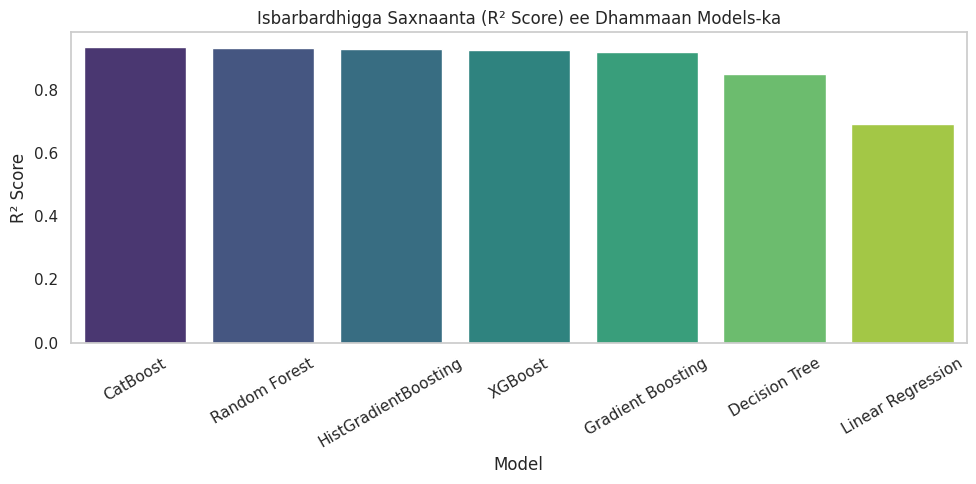

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=comparison_df, x='Model', y='R² Score', palette='viridis')
plt.title('Isbarbardhigga Saxnaanta (R² Score) ee Dhammaan Models-ka')
plt.ylabel('R² Score')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#✅ Save All Models, Scaler, and Features

In [42]:
import joblib

# ✅ Save all trained models
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(gbr_model, 'gbr_model.pkl')
joblib.dump(hgb_model, 'hgb_model.pkl')
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(lr_model, 'linear_regression_model.pkl')
joblib.dump(catboost_model, 'catboost_model.pkl')

# ✅ Save scaler
joblib.dump(scaler, 'scaler.pkl')

# ✅ Save selected features
joblib.dump(selected_features, 'selected_features.pkl')


['selected_features.pkl']